In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

/home/vturino/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


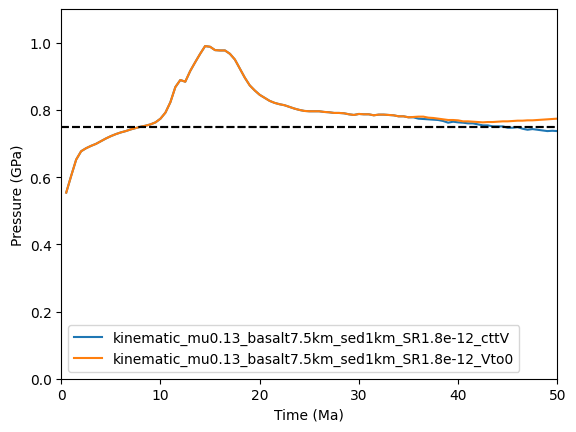

In [ ]:
# models = ["kinematic_mu0.13_basalt7.5km_sed1km_cttV", "kinematic_mu0.13_basalt7.5km_sed1km_Vto50pc", "kinematic_mu0.13_basalt7.5km_sed1km_Vto0"]
models = ["kinematic_mu0.13_basalt7.5km_sed1km_SR1.8e-12_cttV", "kinematic_mu0.13_basalt7.5km_sed1km_SR1.8e-12_Vto0"]

for m, mod in enumerate(models):
    where = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{mod}/txt_files/PT/"
    p = pd.read_csv(f"{where}pt_part_27661.txt", sep = "\s+")
    Pmax = p["Plith"].max()
    Pthresh = round(0.75,3)
    
    plt.plot(p["time"]/2, p["Plith"], label = mod)
    plt.axhline(y = Pthresh, color = "black", linestyle = "--")
    plt.legend()
    plt.ylim(0,1.1)
    plt.xlim(0, 50)
    plt.xlabel("Time (Ma)")
    plt.ylabel("Pressure (GPa)")

    plt.savefig(f"/home/vturino/PhD/projects/exhumation/plots/comparison/PT_diff.pdf")

In [24]:
models = ["kinematic_mu0.13_basalt7.5km_sed1km_cttV", "kinematic_mu0.13_basalt7.5km_sed1km_Vto50pc", "kinematic_mu0.13_basalt7.5km_sed1km_Vto0"]

stag_cttV = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{models[0]}/txt_files/stagnant_particles.txt", sep = "\s+")
stag_Vto50 = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{models[1]}/txt_files/stagnant_particles.txt", sep = "\s+")
stag_Vto0 = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{models[2]}/txt_files/stagnant_particles.txt", sep = "\s+")

In [50]:
n = pd.DataFrame(index = range(0, 3), columns = ["mod", "tot_parts", "tot_exh", "tot_stag", "tot_sub", "sed", "oc", "ecl", "perc_sed", "perc_oc", "perc_ecl"])

for ind_m, m in enumerate(models):
    stag = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{m}/txt_files/stagnant_particles.txt", sep = "\s+")
    exh = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{m}/txt_files/exhumed_times.txt", sep = "\s+")
    parts = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{m}/txt_files/particles_indexes.csv", sep = "\s+")

    #check just particles that stagnate during kin: ti_kin is non nan
    stag_kin = stag[stag["ti_kin"].notna()]
    exh_kin = exh[exh["ti"]>=30]
    print(len(stag_kin), len(exh_kin), len(parts))

    n.loc[ind_m, "tot_exh"] = len(exh_kin)/len(parts) * 100
    n.loc[ind_m, "tot_stag"] = len(stag_kin)/len(parts) * 100
    n.loc[ind_m, "tot_sub"] = 100 - n.loc[ind_m, "tot_exh"] - n.loc[ind_m, "tot_stag"]

    n.loc[ind_m, "mod"] = m
    n.loc[ind_m, "tot_parts"] = len(parts)

    for ind, lith in enumerate(stag.lithology.unique()):
        n.loc[ind_m, lith] = len(stag_kin[stag_kin["lithology"] == lith])
        n.loc[ind_m, f"perc_{lith}"] = len(stag_kin[stag_kin["lithology"] == lith]) / len(parts) * 100
    
n

4972 398 40853
5351 379 40853
5765 0 40853


,mod,tot_parts,tot_exh,tot_stag,tot_sub,sed,oc,ecl,perc_sed,perc_oc,perc_ecl
0,kinematic_mu0.13_basalt7.5km_sed1km_cttV,40853,0.974225,12.170465,86.855311,3691,954,327,9.034832,2.335202,0.800431
1,kinematic_mu0.13_basalt7.5km_sed1km_Vto50pc,40853,0.927716,13.098181,85.974102,4237,966,148,10.371331,2.364575,0.362274
2,kinematic_mu0.13_basalt7.5km_sed1km_Vto0,40853,0.0,14.111571,85.888429,4679,1086,0,11.453259,2.658312,0.0


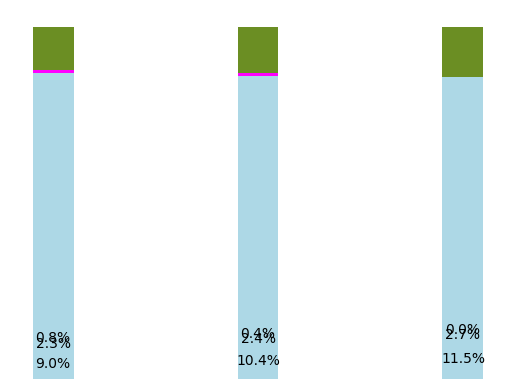

In [51]:
colors = ["lightblue", "magenta", "olivedrab"]

plt.bar(n["mod"], n["tot_sub"], label = "subducted", color = colors[0], width=0.2)
plt.bar(n["mod"], n["tot_exh"], label = "exhumed", color = colors[1], bottom = n["tot_sub"], width=0.2)
plt.bar(n["mod"], n["tot_stag"], label = "stagnated", color = colors[2], bottom = n["tot_sub"] + n["tot_exh"], width=0.2)

# add  the percentages in the color part
for ind, mod in enumerate(models):
    plt.text(ind, n["perc_sed"].iloc[ind]/2, f"{n['perc_sed'].iloc[ind]:.1f}%", ha = "center", va = "center")
    plt.text(ind, n["perc_sed"].iloc[ind] + n["perc_oc"].iloc[ind]/2, f"{n['perc_oc'].iloc[ind]:.1f}%", ha = "center", va = "center")
    plt.text(ind, n["perc_sed"].iloc[ind] + n["perc_oc"].iloc[ind] + n["perc_ecl"].iloc[ind]/2, f"{n['perc_ecl'].iloc[ind]:.1f}%", ha = "center", va = "center")

plt.axis('off')
plt.savefig("/home/vturino/PhD/projects/exhumation/plots/comparison/vel_stag.pdf", dpi = 300)

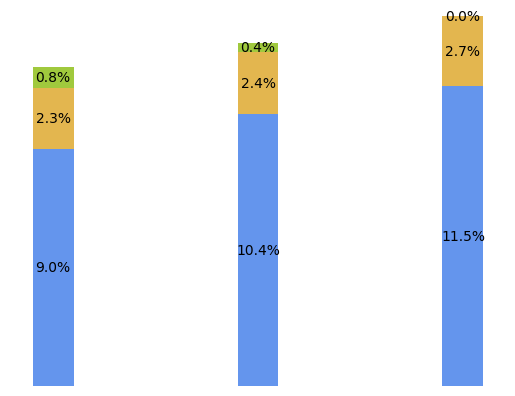

In [23]:
colors_tfin = {
    "sed": "cornflowerblue",
    "oc": "#E3B64F",
    "ecl": "#A0C93D",
    "serp": "lightsalmon"
}

plt.bar(n["mod"], n["perc_sed"], label = "sed", color = colors_tfin["sed"], width=0.2)
plt.bar(n["mod"], n["perc_oc"], bottom = n["perc_sed"], label = "oc", color = colors_tfin["oc"], width=0.2)
plt.bar(n["mod"], n["perc_ecl"], bottom = n["perc_sed"] + n["perc_oc"], label = "ecl", color = colors_tfin["ecl"], width=0.2)

# add  the percentages in the color part
for ind, mod in enumerate(models):
    plt.text(ind, n["perc_sed"].iloc[ind]/2, f"{n['perc_sed'].iloc[ind]:.1f}%", ha = "center", va = "center")
    plt.text(ind, n["perc_sed"].iloc[ind] + n["perc_oc"].iloc[ind]/2, f"{n['perc_oc'].iloc[ind]:.1f}%", ha = "center", va = "center")
    plt.text(ind, n["perc_sed"].iloc[ind] + n["perc_oc"].iloc[ind] + n["perc_ecl"].iloc[ind]/2, f"{n['perc_ecl'].iloc[ind]:.1f}%", ha = "center", va = "center")

plt.axis('off')
plt.savefig("/home/vturino/PhD/projects/exhumation/plots/comparison/vel_stag.pdf", dpi = 300)



In [79]:
fric = ["kinematic_mu0.05_basalt7.5km_sed1km_cttV", "kinematic_mu0.2_basalt7.5km_sed1km_cttV"]
visc = ["kinematic_mu0.13_basalt7.5km_sed1km_SR1.8e-12_cttV", "kinematic_mu0.13_basalt7.5km_sed1km_SR4.5e-13_cttV"]
serp = ["kinematic_mu0.13_basalt7.5km_sed1km_serp1km_cttV", "kinematic_mu0.13_basalt7.5km_sed1km_serp_patch_cttV"]

fric_name = ["mu0.05", "mu0.2"]
visc_name = ["weak", "strong"]
serp_name = ["1km", "patch"]

test = ["fric", "visc", "serp"]

In [80]:
n = pd.DataFrame(index = range(0, 2*len(test)), columns = ["test", "mod", "name", "tot", "exh", "stag", "perc_exh", "perc_stag", "perc_sub"])

for ind_t, t in enumerate(test):
    models = eval(t)
    for m, mod in enumerate(models):
        tot = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{mod}/txt_files/particles_indexes.csv", sep = "\s+")
        exh = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{mod}/txt_files/exhumed_particles.txt", sep = "\s+")
        stag = pd.read_csv(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{mod}/txt_files/stagnant_particles.txt", sep = "\s+")

        # print(m+2*ind_t)

        n.loc[m+2*ind_t, "test"] = t
        n.loc[m+2*ind_t, "mod"] = mod
        n.loc[m+2*ind_t, "name"] = eval(f"{t}_name")[m]
        n.loc[m+2*ind_t, "tot"] = len(tot)
        n.loc[m+2*ind_t, "exh"] = len(exh)
        n.loc[m+2*ind_t, "stag"] = len(stag)
        n.loc[m+2*ind_t, "perc_exh"] = len(exh) / len(tot) * 100
        n.loc[m+2*ind_t, "perc_stag"] = len(stag) / len(tot) * 100
        n.loc[m+2*ind_t, "perc_sub"] = 100 - len(exh) / len(tot) * 100 - len(stag) / len(tot) * 100

n

,test,mod,name,tot,exh,stag,perc_exh,perc_stag,perc_sub
0,fric,kinematic_mu0.05_basalt7.5km_sed1km_cttV,mu0.05,41266,4492,9645,10.885475,23.372752,65.741773
1,fric,kinematic_mu0.2_basalt7.5km_sed1km_cttV,mu0.2,39958,958,349,2.397517,0.873417,96.729066
2,visc,kinematic_mu0.13_basalt7.5km_sed1km_SR1.8e-12_...,weak,41103,4700,3271,11.434688,7.958057,80.607255
3,visc,kinematic_mu0.13_basalt7.5km_sed1km_SR4.5e-13_...,strong,41029,961,4516,2.342246,11.006849,86.650905
4,serp,kinematic_mu0.13_basalt7.5km_sed1km_serp1km_cttV,1km,50859,1681,12127,3.305216,23.844354,72.85043
5,serp,kinematic_mu0.13_basalt7.5km_sed1km_serp_patch...,patch,46843,1057,4660,2.256474,9.948125,87.795402


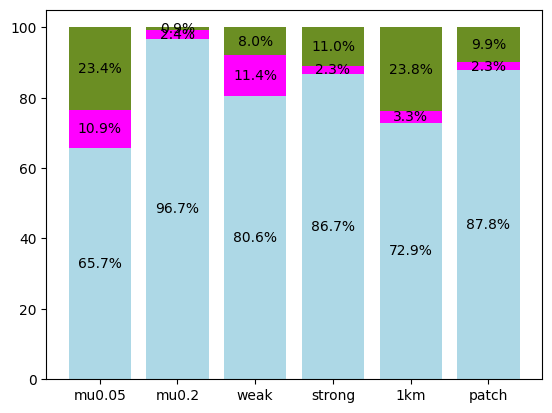

In [83]:
# for each model: bar with perc_ex, perc_stage, perc_sub

color = {
    "perc_sub": "lightblue",
    "perc_exh": "magenta",
    "perc_stag": "olivedrab"
}

width = 0.8

plt.bar(n["name"], n["perc_sub"], label = "sub", color = color["perc_sub"], width=width)
plt.bar(n["name"], n["perc_exh"], label = "exh", bottom = n["perc_sub"], color = color["perc_exh"], width=width)
plt.bar(n["name"], n["perc_stag"], bottom = n["perc_exh"] + n["perc_sub"], label = "stag", color = color["perc_stag"], width=width)

for ind, mod in enumerate(n["mod"]):
    plt.text(ind, n["perc_sub"].iloc[ind]/2, f"{n['perc_sub'].iloc[ind]:.1f}%", ha = "center", va = "center")
    plt.text(ind, n["perc_sub"].iloc[ind] + n["perc_exh"].iloc[ind]/2, f"{n['perc_exh'].iloc[ind]:.1f}%", ha = "center", va = "center")
    plt.text(ind, n["perc_sub"].iloc[ind] + n["perc_exh"].iloc[ind] + n["perc_stag"].iloc[ind]/2, f"{n['perc_stag'].iloc[ind]:.1f}%", ha = "center", va = "center")



plt.savefig("/home/vturino/PhD/projects/exhumation/plots/comparison/rheo_cttV.pdf", dpi = 300)
# plt.axis('off')